# LOAN STATUS CLASSIFICATION

## 1. Defining the Question

### a) Specifying the Question

We intend to build a classification model that assesses certain specifics of the client's information for example the client’s current income, credit score, the purpose of the loan with the help of (specific) certain Machine learning algorithms to classify the data into either a good loan application or a bad loan application. This in turn helps the bank predict which loan applications to grant. We will therefore build several models and select the one that works best.

### b) Defining the Metric for Success

Our study will be considered successful if we are able to meet the below objectives.

**Main Objective**

To find the groups of people applying for loans in banks at an individual level by building an unsupervised clustering model. 

**Specific Objectives**

i.)  To determine the characteristics responsible for customer loan classification through feature selection.
ii.) To determine the maximum loan limit for certain clients based on these features.
iii.) To check for anomalies in the number of open accounts by an individual.
iv.) To make a prediction on whether a client is likely to pay off their loan or not. 
v.) To determine the most common purpose for loan application.


### c) Understanding the contex

Loan classification, risk management, and provisioning processes are closely intertwined in a bank's operations. Loan pricing, the frequency and intensity of review and analysis, the rigor of monitoring, and the tolerance for loan losses (which should be precisely proportional to the risk rating grade) are all determined by the characteristics of the various risk rating classes. They are  associated with the amount of risk indicated by a loan's assigned risk rating grade), and the amount of risk indicated by the amount of risk to absorb unforeseen losses, regulatory capital is essential. When loan classification systems are combined with management's ability to recognize negative trends, there is an improved decision making process through portfolio management and early reporting techniques.

A loan classification system is an important component of a bank's credit risk assessment and valuation process, as it classifies loans and groups of loans with comparable credit risk characteristics into risk categories. Underwriting and approval, monitoring and managing credit quality, early identification of adverse trends and potentially problem loans, loan loss provisioning, management reporting, and the determination of regulatory capital requirements are all areas where a loan classification system can be useful. Loan classification systems are recognized by both accounting frameworks and Basel II/III regulatory capital frameworks as suitable instruments for accurately assessing credit risk and establishing groupings of loans for collective evaluation for loan loss calculation.

### d). Recording the Experimental Design

### e) Data Relevance

We shall be using the datasets below:

i. Credit test dataset ( https://www.kaggle.com/code/sazack/loan-status-classification/data?select=credit_test.csv )

ii. Credit train dataset ( https://www.kaggle.com/code/sazack/loan-status-classification/data?select=credit_train.csv )

## 2. Reading the Data

In [201]:
# let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# let's ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [202]:
# import load_data.py to read data from file

import load_data
from load_data import Data

In [203]:
# let's create an object of class Data
loan_train = Data('credit_train.csv')
loan_test = Data('credit_test.csv')

### Checking the Data

In [204]:
# lets check our data using print_results function in the load_data module
loan_train.print_results()

Loading the data...
Top part of the data...
                                Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            Na

In [206]:
# print results for loan_test object
loan_test.print_results()

Loading the data...
Top part of the data...
                                Loan ID                           Customer ID  \
0  f738779f-c726-40dc-92cf-689d73af533d  ded0b3c3-6bf4-4091-8726-47039f2c1b90   
1  6dcc0947-164d-476c-a1de-3ae7283dde0a  1630e6e3-34e3-461a-8fda-09297d3140c8   
2  f7744d01-894b-49c3-8777-fc6431a2cff1  2c60938b-ad2b-4702-804d-eeca43949c52   
3  83721ffb-b99a-4a0f-aea5-ef472a138b41  12116614-2f3c-4d16-ad34-d92883718806   
4  08f3789f-5714-4b10-929d-e1527ab5e5a3  39888105-fd5f-4023-860a-30a3e6f5ccb7   

   Current Loan Amount        Term  Credit Score  Annual Income  \
0             611314.0  Short Term         747.0      2074116.0   
1             266662.0  Short Term         734.0      1919190.0   
2             153494.0  Short Term         709.0       871112.0   
3             176242.0  Short Term         727.0       780083.0   
4             321992.0  Short Term         744.0      1761148.0   

  Years in current job Home Ownership             Purpose  Monthly

## 3. External Data Validation



The data was provided by the bank about the brand and was based on a previous related banking data, there is no need for external validation.

## 4. Data Preparation

### a) Uniformity

In [207]:
# let's check the naming of the columns
loan_train.data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [208]:
# let's replace the white spaces in the column names with underscore
loan_train.data.columns = [col.replace(' ', '_') for col in loan_train.data.columns]
loan_test.data.columns = [col.replace(' ', '_') for col in loan_test.data.columns]

In [209]:
# let's check the naming of the columns again
loan_train.data.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

* The data is already in a uniform format.

### b) Completeness

In [210]:
# let's check the data for missing values and output as percentage
missing_values = loan_train.data.isnull().sum().sort_values(ascending=False)
percentage = missing_values / loan_train.data.shape[0] * 100

# create a dataframe with the missing values and percentage
missing_values_df = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': percentage})
missing_values_df

,Missing_Values,Percentage
Months_since_last_delinquent,53655,53.380624
Credit_Score,19668,19.567423
Annual_Income,19668,19.567423
Years_in_current_job,4736,4.711781
Bankruptcies,718,0.714328
Tax_Liens,524,0.521320
Maximum_Open_Credit,516,0.513361
Years_of_Credit_History,514,0.511372
Current_Credit_Balance,514,0.511372
Number_of_Credit_Problems,514,0.511372


* The data has alot of missing values

In [211]:
# let's drop the Months_since_last_delinquent column
loan_train.data.drop('Months_since_last_delinquent', axis=1, inplace=True)

In [212]:
# let's impute Credit_Score and Annual_Income with the mean
loan_train.data['Credit_Score'].fillna(loan_train.data['Credit_Score'].mean(), inplace=True)
loan_train.data['Annual_Income'].fillna(loan_train.data['Annual_Income'].mean(), inplace=True)

In [213]:
# let's check the data for missing values and output as percentage
missing_values = loan_train.data.isnull().sum().sort_values(ascending=False)
percentage = missing_values / loan_train.data.shape[0] * 100

# create a dataframe with the missing values and percentage
missing_values_df = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': percentage})
missing_values_df

,Missing_Values,Percentage
Years_in_current_job,4736,4.711781
Bankruptcies,718,0.714328
Tax_Liens,524,0.521320
Maximum_Open_Credit,516,0.513361
Monthly_Debt,514,0.511372
Current_Credit_Balance,514,0.511372
Number_of_Credit_Problems,514,0.511372
Number_of_Open_Accounts,514,0.511372
Years_of_Credit_History,514,0.511372
Loan_ID,514,0.511372


In [214]:
# let's drop the remmaining missing values
loan_train.data.dropna(inplace=True)

In [215]:
# let's check the data for missing values 
loan_train.data.isnull().sum().sum()

0

* The data does not have any missing values.

### c) Consistency

In [216]:
# let's check the data for duplicate values as a percentage
duplicate_values = loan_train.data.duplicated().sum()
percentage = duplicate_values / loan_train.data.shape[0] * 100

print(f"The data has {duplicate_values} duplicate values and {percentage}% of the data")

The data has 9781 duplicate values and 10.234169003473822% of the data


* We will drop the duplicates.

In [217]:
# let's drop the duplicate values
loan_train.data.drop_duplicates(inplace=True)

In [218]:
# let's check the data for duplicate values 
loan_train.data.isnull().sum().sum()

0

* The data does not have duplicate values.

### d) Accuracy

In [219]:
# let's check the datatypes of the data
loan_train.data.dtypes

# let's drop customer id and loan id
loan_train.data.drop(['Customer_ID', 'Loan_ID'], axis=1, inplace=True)

In [220]:
# let's convert Loan_Status and Term to binary
loan_train.data['Loan_Status'] = loan_train.data['Loan_Status'].map({'Fully Paid': 1, 'Charged Off': 0})
loan_train.data['Term'] = loan_train.data['Term'].map({'Short Term': 0, 'Long Term': 1})
loan_train.data_head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,445412.0,0,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,0,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,0,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,1,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,0,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


### e) Anomalies

In [221]:
# let's create a variable to store all columns with numeric data types
numeric_columns = [col for col in loan_train.data.columns if loan_train.data[col].dtype in ['int64', 'float64']]
numeric_columns

['Loan_Status',
 'Current_Loan_Amount',
 'Term',
 'Credit_Score',
 'Annual_Income',
 'Monthly_Debt',
 'Years_of_Credit_History',
 'Number_of_Open_Accounts',
 'Number_of_Credit_Problems',
 'Current_Credit_Balance',
 'Maximum_Open_Credit',
 'Bankruptcies',
 'Tax_Liens']

In [222]:
# let's remove loan status and term from the numeric columns
numeric_columns.remove('Loan_Status')
numeric_columns.remove('Term')

In [223]:
# let's check the columns with outliers using a boxplot using a for loop for numeric columns in a vertical orientation using seaborn
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot( y=loan_train[col], orient='h', color='green')
    plt.show()

TypeError: 'Data' object is not subscriptable

<Figure size 720x360 with 0 Axes>

* The data has outliers which will not be dropped because they represent the actual values in the data.

## 5. Exploratory Data Analysis

### a) Univariate Analysis

In [224]:
# let's print the description of the data
loan_train.data.describe()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,85791.000000,8.579100e+04,85791.000000,85791.000000,8.579100e+04,85791.000000,85791.000000,85791.000000,85791.000000,8.579100e+04,8.579100e+04,85791.000000,85791.000000
mean,0.751547,1.312880e+07,0.270075,1115.092001,1.392734e+06,18641.047257,18.037267,11.179529,0.159143,2.962821e+05,7.748651e+05,0.110816,0.027719
std,0.432118,3.336658e+07,0.444001,1385.201551,9.921440e+05,12197.799878,6.815781,5.007267,0.469544,3.737015e+05,8.932842e+06,0.341166,0.251168
min,0.000000,1.542200e+04,0.000000,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.858560e+05,0.000000,715.000000,9.500950e+05,10404.590000,13.400000,8.000000,0.000000,1.146270e+05,2.794110e+05,0.000000,0.000000
50%,1.000000,3.204740e+05,0.000000,737.000000,1.378277e+06,16363.560000,16.900000,10.000000,0.000000,2.120970e+05,4.764760e+05,0.000000,0.000000
75%,1.000000,5.362060e+05,1.000000,1076.456089,1.512400e+06,24157.455000,21.500000,14.000000,0.000000,3.707755e+05,7.950250e+05,0.000000,0.000000
max,1.000000,1.000000e+08,1.000000,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [225]:
# let's check for skewness of the data
skew_df = pd.DataFrame({'Skew': loan_train.data[numeric_columns].apply(lambda x: x.skew())})
skew_df

,Skew
Current_Loan_Amount,2.219423
Credit_Score,4.067170
Annual_Income,56.789618
Monthly_Debt,2.278639
Years_of_Credit_History,1.026573
Number_of_Open_Accounts,1.180051
Number_of_Credit_Problems,4.966310
Current_Credit_Balance,14.799388
Maximum_Open_Credit,127.265619
Bankruptcies,3.578498


* The variables are right skewed. The values are positive.

In [226]:
# let's check for kurtosis of the data
kurtosis_df = pd.DataFrame({'Kurtosis': loan_train.data[numeric_columns].apply(lambda x: x.kurtosis())})
kurtosis_df

,Kurtosis
Current_Loan_Amount,2.926143
Credit_Score,14.807990
Annual_Income,8803.245737
Monthly_Debt,24.318686
Years_of_Credit_History,1.645755
Number_of_Open_Accounts,3.083973
Number_of_Credit_Problems,51.441956
Current_Credit_Balance,789.748847
Maximum_Open_Credit,18435.876851
Bankruptcies,18.902574


In [227]:
# let's get the distribution plot of the data using a for loop of numeric columns
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(loan_train[col], color='green')
    plt.show()

TypeError: 'Data' object is not subscriptable

<Figure size 720x360 with 0 Axes>

* The data is positively skewed and leptokurtic.

In [228]:
# let's store the columns with object data types in a variable
cat_columns = [col for col in loan_train.data.columns if loan_train.data[col].dtype == 'object']
cat_columns

['Years_in_current_job', 'Home_Ownership', 'Purpose']

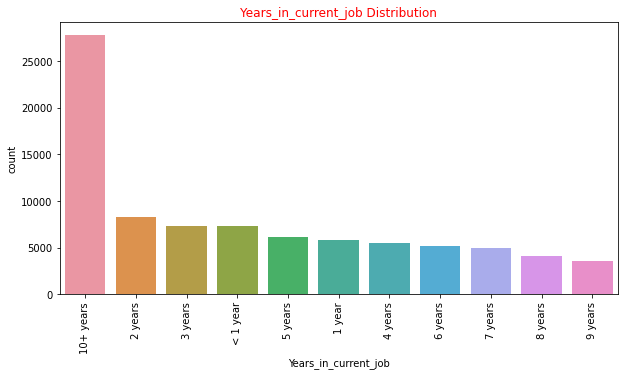

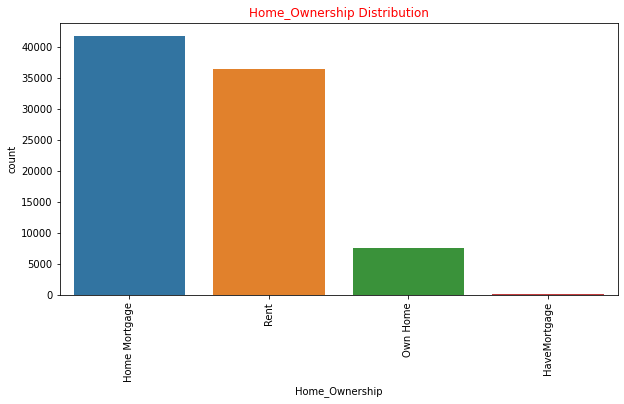

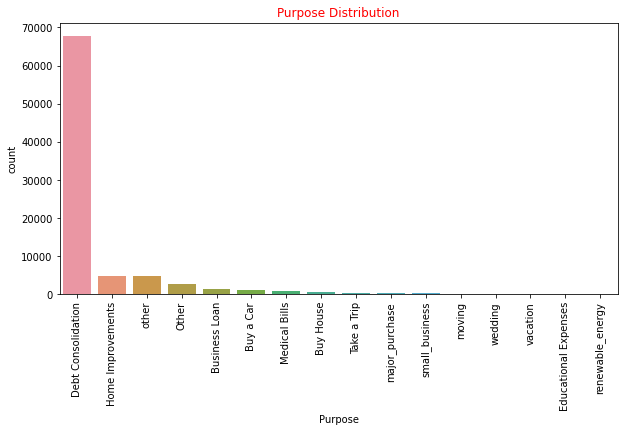

In [229]:
# let's plot a bar graph of the data using a for loop of categorical columns
for col in cat_columns:
    plt.figure(figsize=(10, 5))
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=loan_train.data, order= loan_train.data[col].value_counts().index)
    plt.title(f'{col} Distribution', color='red')
    plt.show()

### b) Bivariate Analysis

#### Categorical vs Categorical Features

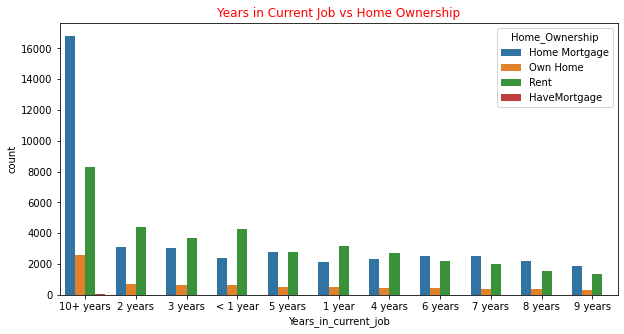

In [230]:
# categorical vs categorical

# let's create a stack barplot of years in current job and home ownership and sort in descending order

plt.figure(figsize=(10, 5))
sns.countplot(x='Years_in_current_job', hue='Home_Ownership', data=loan_train.data,
              order=loan_train.data['Years_in_current_job'].value_counts().index)
plt.title('Years in Current Job vs Home Ownership', color='red')
plt.show()

#### Categorical vs Numerical Features

In [231]:
loan_train.data.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [232]:
# Categorical vs Numeric

# let's create a barplot of Years in current job and Loan Amount
plt.figure(figsize=(10, 5))
sns.barplot(x='Years_in_current_job', y='Current_Loan_Amount', data=loan_train,
            order=loan_train['Years_in_current_job'].value_counts().index)
plt.title('Years in Current Job vs Loan Amount', color='red')
plt.show()


TypeError: 'Data' object is not subscriptable

<Figure size 720x360 with 0 Axes>

#### Numerical vs Numerical Features

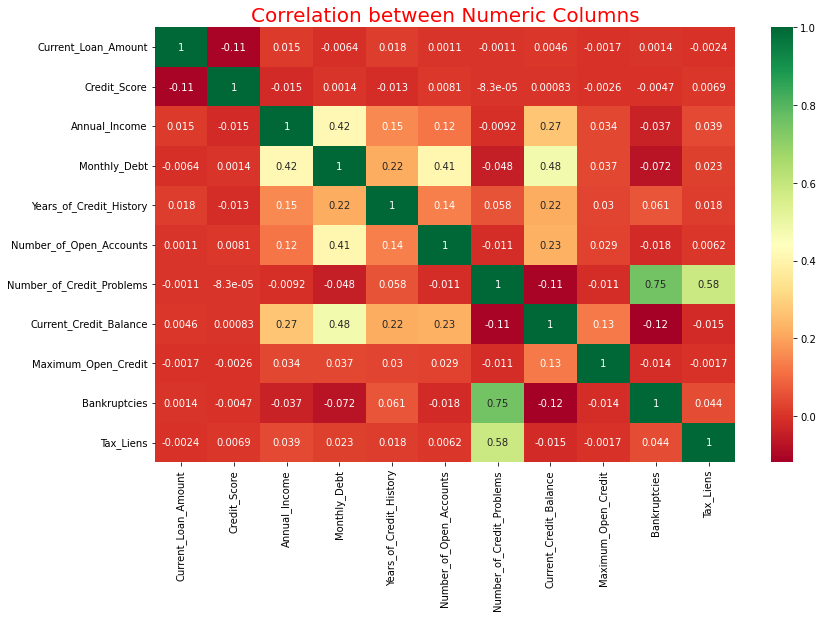

In [233]:
# Numerical vs Numerical: 
# 
# Covariance, Correlation and Scatter Plot

# let's get plot a heatmap of the correlation between the numeric columns
plt.figure(figsize=(13, 8))
sns.heatmap(loan_train.data[numeric_columns].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation between Numeric Columns', color='red', fontsize=20)
plt.show()


In [234]:
# let's plot the pairplot of the numeric columns
plt.figure(figsize=(13, 8))
sns.pairplot(loan_train.data[numeric_columns], diag_kind='kde', palette='husl')
plt.title('Pairplot of Numeric Columns', color='red', fontsize=20)
plt.show()

## 6. Modeling